In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display, Image

In [2]:
stations = pd.read_csv("RawOriginalData_Header.csv")
stationsArr = stations.to_numpy()
honoIndex = np.where(stationsArr == "Hono Substation")[0][0]
beretaniaIndex = np.where(stationsArr == "Beretania Pump")[0][0]
focus = np.zeros((len(stations)))
focus[[honoIndex, beretaniaIndex]] = 1
stations["Focus"] = np.array(focus, dtype = bool)

fig = px.scatter_mapbox(stations, lat = "Lat_DD", lon = "Lon_DD", hover_name = 'Name', hover_data = ["Lat_DD", "Lon_DD"], color = "Focus", color_discrete_sequence = ["green", "orange"])
fig.update_layout(showlegend = False, mapbox_style = "stamen-terrain", mapbox_zoom = 14, mapbox = dict(center = dict(lat = 21.30572477, lon = -157.857)))
fig.update_traces(marker = dict(size = 15))
fig.show()

In [3]:
hono = np.array(np.loadtxt("tab_704.csv", dtype = str, delimiter = ','))
beretania = np.array(np.loadtxt("tab_705.csv", dtype = str, delimiter = ','))

trace = go.Heatmap(
   x = hono[1:, 0].astype(float),
   y = hono[0, 1:],
   z = hono[1:, 1:].astype(float).T,
   type = 'heatmap',
   colorscale = 'Teal'
)
data = [trace]
fig = go.Figure(data = data)
fig.update_layout(title = "Hono Substation Historic Rain Measurement (mm)")

fig.show()

In [4]:
trace = go.Heatmap(
   x = beretania[1:, 0].astype(float),
   y = beretania[0, 1:],
   z = beretania[1:, 1:].astype(float).T,
   type = 'heatmap',
   colorscale = 'Teal'
)
data = [trace]
fig = go.Figure(data = data)
fig.update_layout(title = "Beretania Pump Historic Rain Measurement (mm)")
fig.show()

For the stations map, I decided to use the most aesthetically pleasing background map that still allows the markers to stand out. I made sure that the default view is centered and zoomed in on the two stations. For the marker colors, I decided on colors that stood out reasonably well but were not garish or contrasting unpleasantly with the background map.

For the heatmap, I used a color scale that reflects what the data is showing. Since it's about rainfall, a scale with lighter to darker shades of blue seems appropriate. The overlapping time periods on each heatmap seem to agree with each other fairly well, which is to be expected since the two stations are close together. I checked this by searching for the rain-heavy months at one station and then looked at the same month for the other station. In most cases, the rain-heavy months line up on each heatmap. If we looked at data for stations that were further apart, we could get an idea of how the climate differs around the island. For example, comparing a station on the windward side with a station on west side should show that the windward side gets a lot more rain.

I noticed something odd in the beretania pump heatmap in that there are some months that show negative rainfall. However, after checking the raw data I can see that that is actually what was reported and it is not a fault with my code. I have decided to leave it as it is, since I have no way of knowing why those negative values are there and therefore I have no justification for removing them. It's possible that the data is not an absolute measurement but is actually relative to some other value.

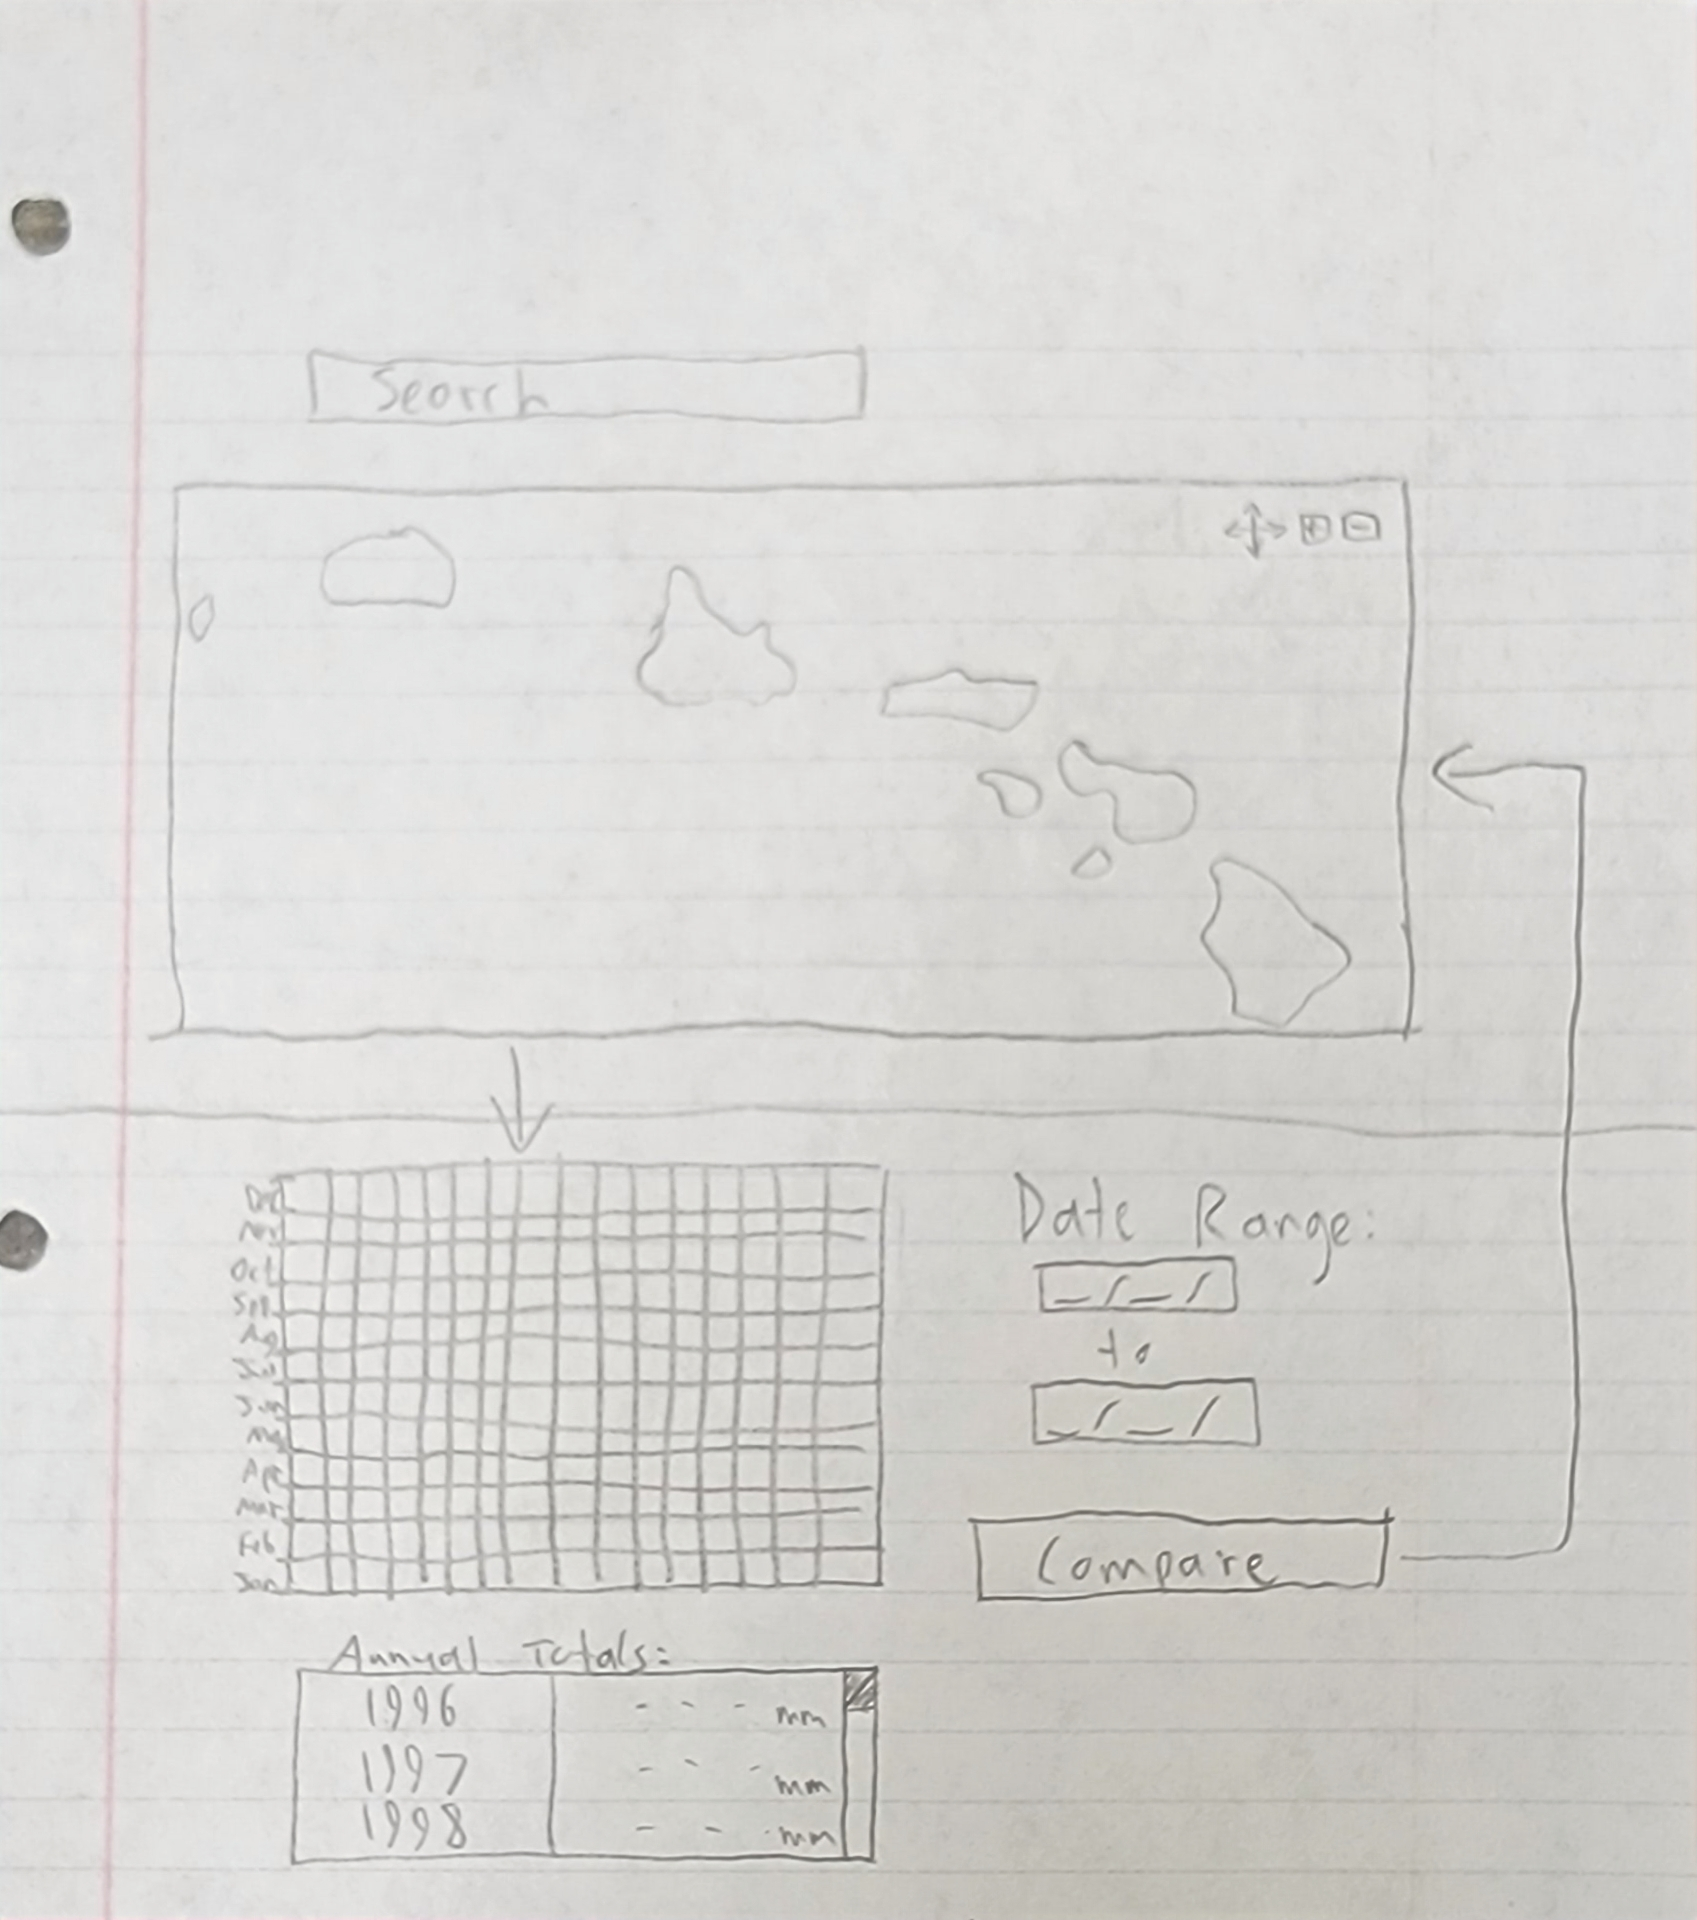

In [5]:
display(Image(filename='layout.jpg'))

In this system I have drawn, it is possible for a user to search for the name of a station, or pan and zoom on the map to select one. If a station is hovered over, an annotation box will appear with that station's name and range of dates for which data is available. Once a station has been selected, that station's entire history will be shown on a heatmap underneath. This is an example of a linked view. The user will have the option to select a custom date range, and underneath the heatmap is a list with the annual total rainfall for each year. If a user hovers over a cell, the month, year, and amount of rain will appear in an annotation box. There is also the option to compare with another station, which would bring a user back to the map to choose. Their first choice of station would be highlighted a different color and unable to be selected. After a second station has been chosen, the heatmap will show the difference between the first and second stations' rainfall measurements, and the list will show the difference over each whole year.

As an example of a workflow, imagine someone wants to compare rainfall between Kailua and Waianae last year. First, they select a station in Kailua from the map, then they click the compare button and select a station in Waianae. Now, they input the date range Jan 1, 2022 to Dec 31, 2022. The heatmap would now display the information they were interested in broken down by month, and the list below would have the difference over the entire year.